# Primer dia: Toma de datos dura
Tomamos la mayor cant de datos para ir armando el df y de paso lo graficamos en Bode para ir viendo como van quedando.

Nuestra blackbox es la C y equipos usados en el dia 1: 1

Datos de calibracion de la sinusoide:
Frec: 50Hz
Voltaje: 5.85 VRMS-Ciclo

In [ ]:
# Comando para instalar uncertainties (solo ejecutar en google colab):
# !pip install uncertainties

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uncertainties as unc
import uncertainties.unumpy as unumpy

In [3]:
data = { # frec (Hz), vi (V), vo (mV), dt (ms)
    'frec': [7.022, 10.25, 13.505, 16.73, 19.99, 64.94, 109.4, 154.7, 199.6, 649.4, 1100, 1550, 2000, 6510, 11010, 15050, 2985, 3805, 4690, 5656, 6570, 313.5, 425.5, 538.8, 877.2, 3185, 4673, 2451, 31.06, 42.55, 87.26, 7010, 8010, 9009, 22520, 35340, 52360],
    'errfrec':[0.001, 0.01, 0.005, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 1, 1, 1, 1, 10, 0.1, 0.1, 0.1, 1, 1, 1, 1, 0.01, 0.05, 0.01, 10, 10, 10, 10, 10, 10],
    'vi': [4.34, 5, 5.33, 5.51, 5.61, 5.87, 5.87, 5.86, 5.85, 5.61, 5.26, 4.88, 4.55, 3.45, 3.26, 3.21, 4.06, 3.84, 3.65, 3.52, 3.44, 5.83, 5.78, 5.72, 5.47, 3.98, 3.64, 4.34, 5.83, 5.85, 5.87, 3.405, 3.36, 3.31, 3.20, 3.16, 3.14],
    'vo': [52.5, 85.3, 115, 141, 163, 286, 334, 386, 441, 1090, 1640, 2040, 2310, 3060, 3120, 3150, 2680, 2870, 2960, 3020, 3050, 667, 772, 936, 1390, 2720, 2910, 2520, 218, 250, 311, 3065, 3100, 3110, 3180, 3170, 3160],
    'errvo': [0.5, 0.1, 0.5, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 1, 1, 10, 10, 10, 10, 1, 1, 1, 10, 10, 10, 10, 10, 10],
    'dt':[34.4, 21.6, 15.8, 11.2, 8.8, 2.04, 1.24, 0.88, 0.76, 0.300, 0.172, 0.112, 0.079, 0.0136, 0.0054, 0.0028, 0.045, 0.031, 0.022, 0.0172, 0.0128, 0.530, 0.440, 0.360, 0.220, 0.041, 0.023, 0.061, 4.8, 3.1, 1.4, 0.0112, 0.0096, 0.0078, 0.00152, 760e-6, 200e-6],
    'errdt':[0.4, 0.4, 0.2, 0.2, 0.1, 0.04, 0.04, 0.04, 0.02, 0.004, 0.001, 0.002, 0.001, 0.0004, 0.0002, 0.0001, 0.001, 0.001, 0.004, 0.0004, 0.0004, 0.01, 0.01, 0.004, 0.004, 0.001, 0.001, 0.001, 0.1, 0.1, 0.04, 0.0004, 0.0004, 0.0002, 0.0002, 40e-6, 20e-6]   
}

df = pd.DataFrame(data)

In [5]:
#Arreglo unidades
df['vo'] = df['vo'] / 1e3 # Convertir de mV a V
df['errvo'] = df['errvo'] / 1e3 # Convertir de mV a V
df['dt'] = df['dt'] / 1e3 # Convertir de ms a s
df['errdt'] = df['errdt'] / 1e3 # Convertir de ms a s

In [6]:
# Creo columnas con variables de incertidumbre
df['frec_u'] = unumpy.uarray(df['frec'], df['errfrec'])
df['vi_u'] = unumpy.uarray(df['vi'], 0.01)
df['vo_u'] = unumpy.uarray(df['vo'], df['errvo'])
df['dt_u'] = unumpy.uarray(df['dt'], df['errdt'])
# Calculo la frecuencia angular
df['w_u'] = 2 * np.pi * df['frec_u']

# Defino resistencia con error del 5% 
R = unumpy.uarray(62, 0.05 * 62)  
df['Io'] = df['vo_u'] / R

# Calculo la impedancia
df['Z_u'] = df['vo_u'] / df['vi_u']

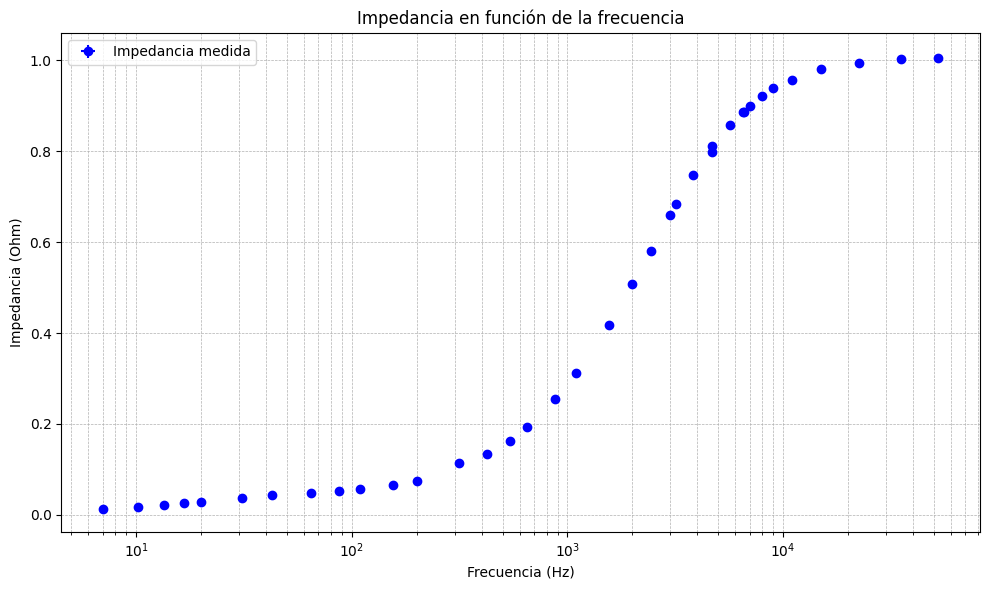

In [7]:
# Grafico la impedancia en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.errorbar(unumpy.nominal_values(df['frec_u']), 
             unumpy.nominal_values(df['Z_u']), 
             yerr=unumpy.std_devs(df['Z_u']),
             xerr=unumpy.std_devs(df['frec_u']), 
             fmt='o', 
             label='Impedancia medida', 
             color='blue')
plt.xscale('log')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Impedancia (Ohm)')
plt.title('Impedancia en función de la frecuencia')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df.to_csv('datos1.csv', index=False)